<a href="https://colab.research.google.com/github/puneat/COVID-19_Estimation/blob/master/EDA_%2B_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
cd /gdrive/My Drive/ml

/gdrive/My Drive/ml


In [ ]:
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 798kB 21.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=a39e2b40d82a6434b5635e35916e3ff593f8df8b1ecd0ce5cf58aa771f9f655f
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


In [ ]:
import numpy as np
import csv
from numpy import array
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import statistics
from scipy.integrate import odeint
%matplotlib inline 
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
import io
from sklearn.preprocessing import LabelEncoder
from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span

output_notebook(resources=INLINE)
le=LabelEncoder()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
with open('STATE_DATA/DEL.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))
cases=array(cases)
num_days = np.linspace(1,cases.shape[0]-1 , cases.shape[0]-1)
total_cases=cases[1:,[1,2,3]];
total_cases.astype(int);

daily_cases=cases[1:,[1,3,5]];
daily_cases.astype(int);

day5_moving_averages=cases[1:,[1,8,9]];
day5_moving_averages.astype(float);

day10_moving_averages=cases[1:,[1,10,11]];
day10_moving_averages.astype(float);

macd_moving_averages=cases[1:,[1,12]];
macd_moving_averages.astype(float);


<Figure size 720x720 with 0 Axes>

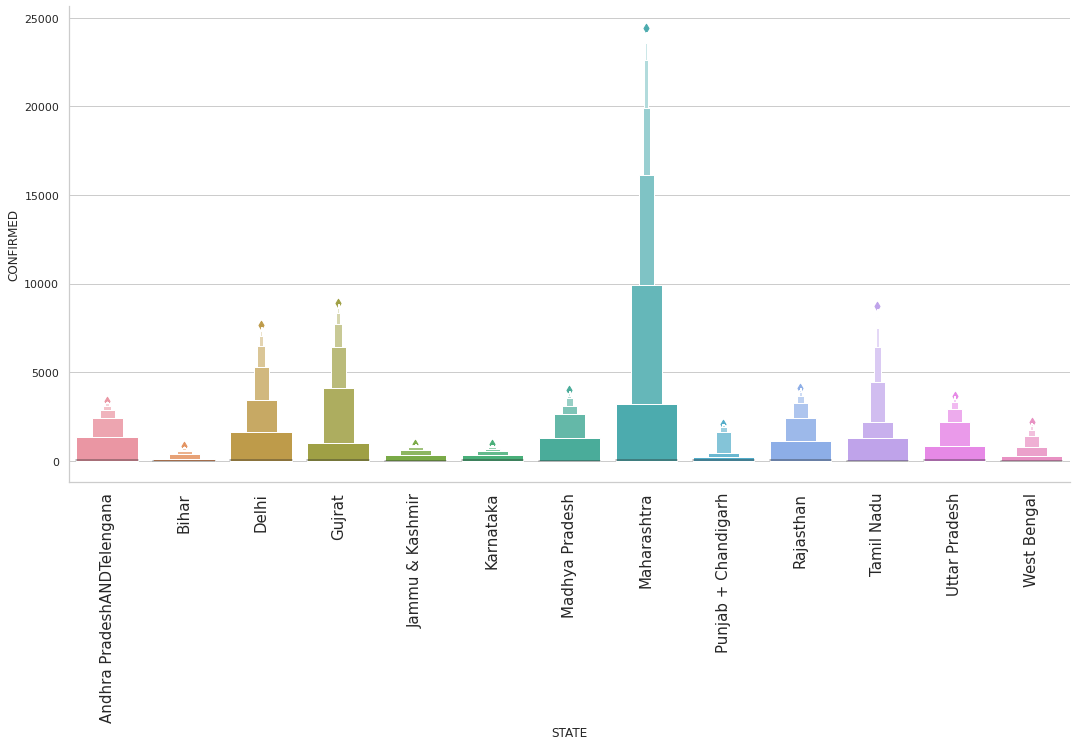

In [ ]:
state_data = pd.read_csv('/gdrive/My Drive/ml/STATE_DATA/combined_states.csv')
#confirmed_dist_india = state_data.groupby('STATE')['CONFIRMED_INC'].sum().sort_values(ascending=False)
#cured_dist_india = state_data.groupby('STATE')['CURED_INC'].sum().sort_values(ascending=False)
#death_dist_india = state_data.groupby('STATE')['DEATHS_INC'].sum().sort_values(ascending=False)

g=sns.catplot(x='STATE',y='CONFIRMED',kind='boxen',data=state_data)
g.fig.set_figwidth(21)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

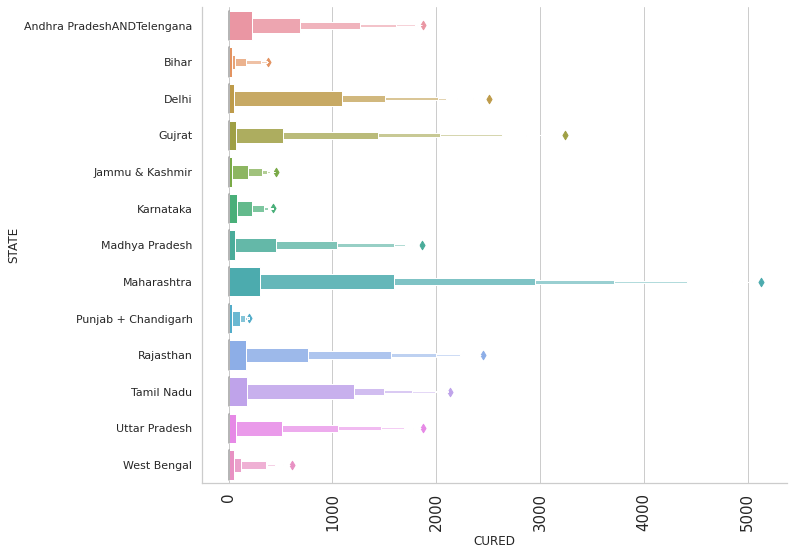

In [ ]:
g=sns.catplot(y='STATE',x='CURED',kind='boxen',data=state_data)
g.fig.set_figwidth(21)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

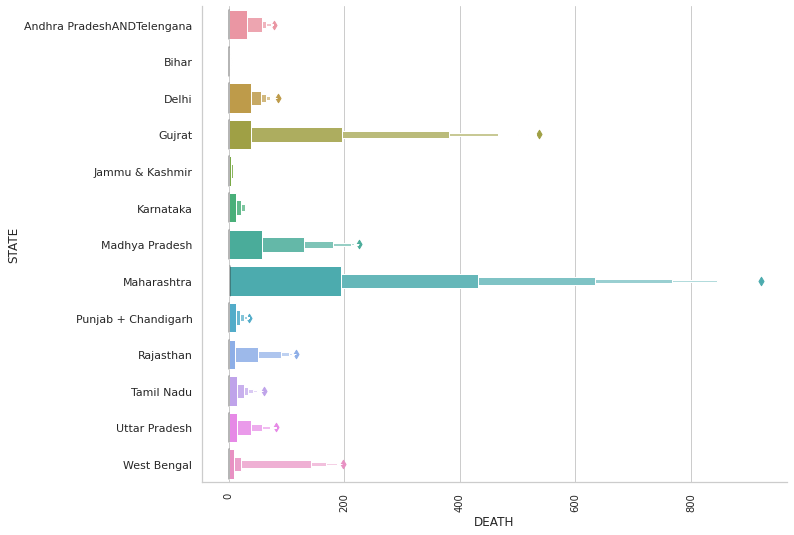

In [ ]:
g=sns.catplot(y='STATE',x='DEATH',kind='boxen',data=state_data)
g.fig.set_figwidth(21)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=10)

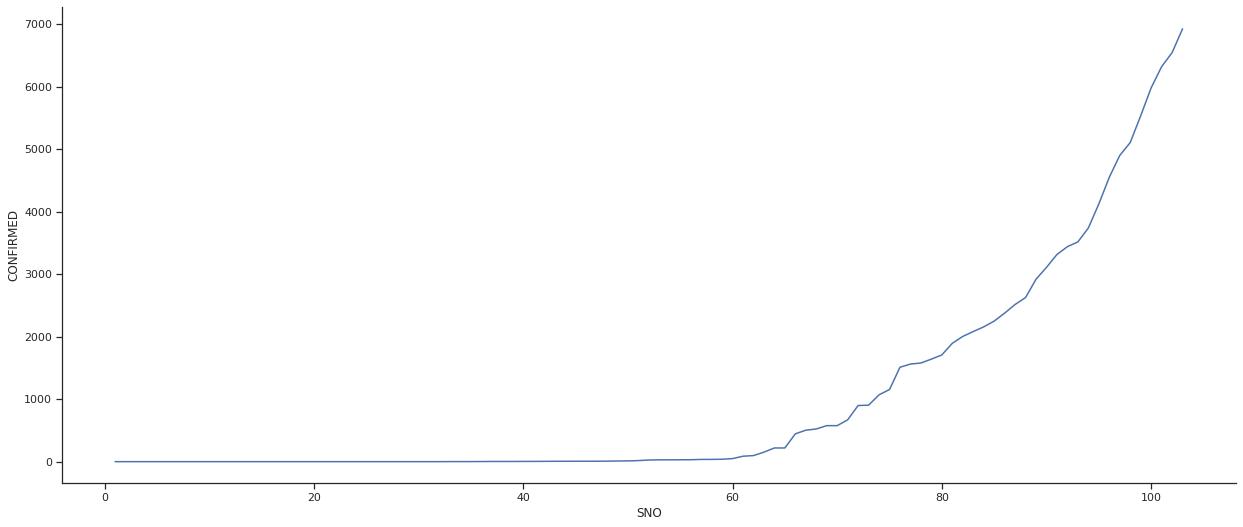

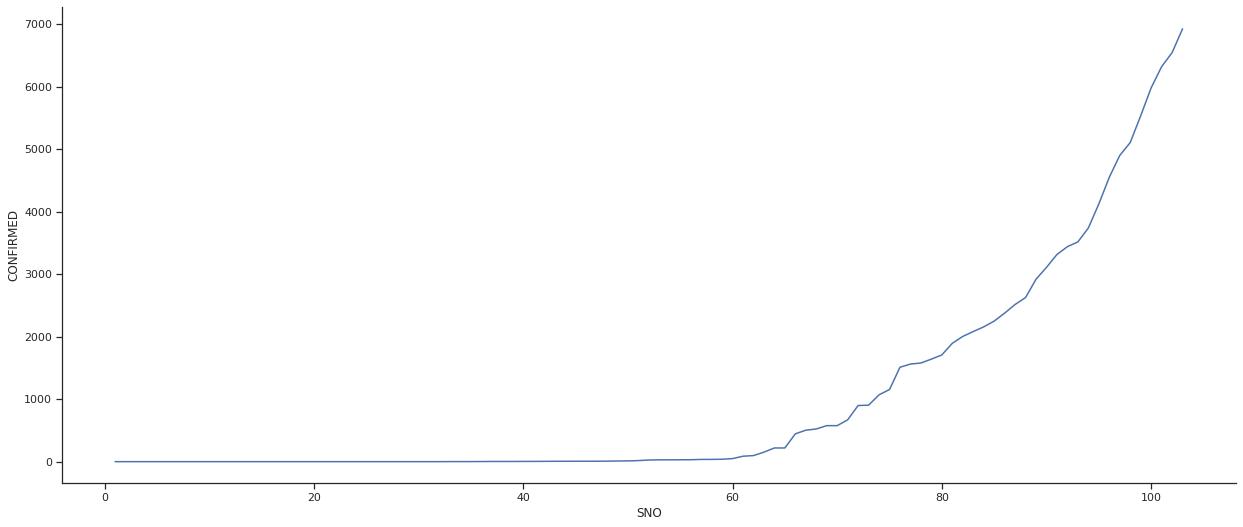

In [ ]:
delhi_data = pd.read_csv('/gdrive/My Drive/ml/STATE_DATA/DEL.csv')
sns.set(style="ticks")

g1=sns.relplot(x="SNO", y="CONFIRMED", kind="line",data=delhi_data,ax=axs[0]);
g2=sns.relplot(x="SNO", y="CURED", kind="line",data=delhi_data,ax=axs[1]);
g1.fig.set_figwidth(21)
g1.fig.set_figheight(8)
g2.fig.set_figwidth(21)
g2.fig.set_figheight(8)

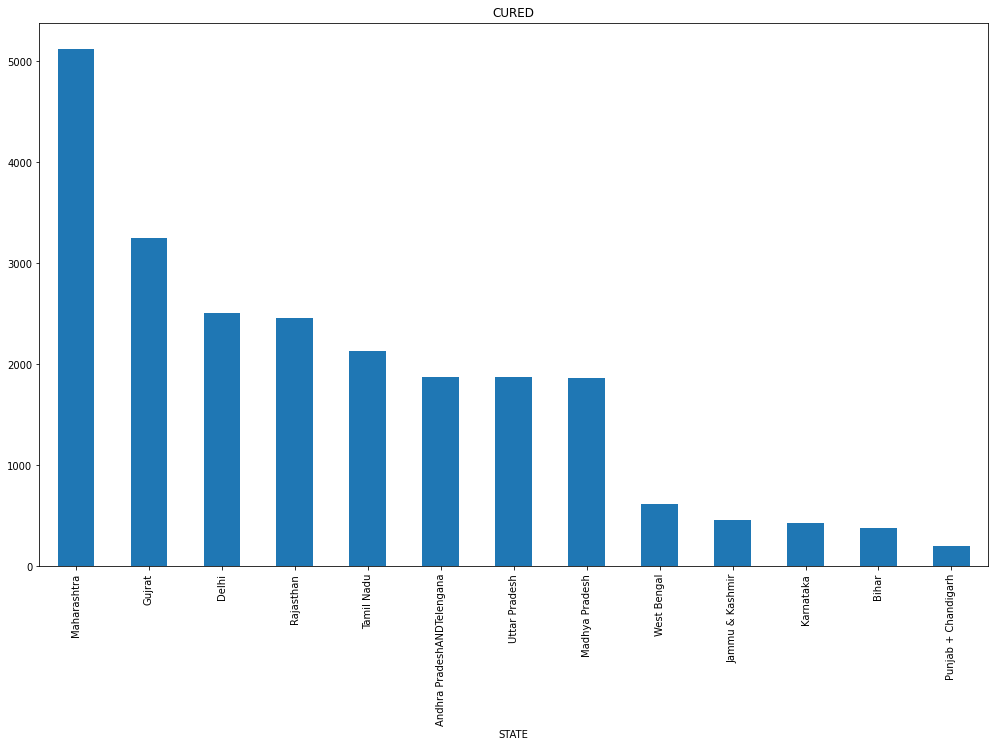

In [ ]:
fig = plt.figure(figsize=(17,10))
cured_dist_india.plot(kind="bar",title='CURED')
plt.show ()

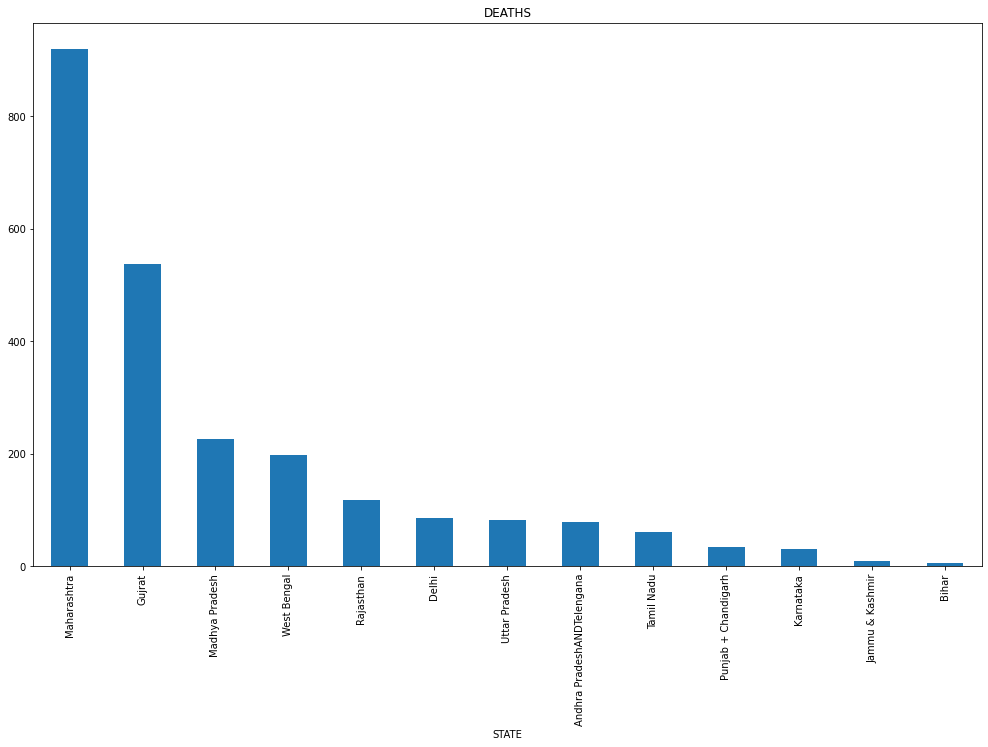

In [ ]:
fig = plt.figure(figsize=(17,10))
death_dist_india.plot(kind="bar",title='DEATHS')
plt.show ()

In [ ]:
with open('/gdrive/My Drive/ml/STATE_DATA/combined_states.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))
state_cases=array(cases)
num_days = np.linspace(1,cases.shape[0]-1 , cases.shape[0]-1)
state_cases=cases[1:,[2,3,4]];
state_cases.astype(int);


In [ ]:
def plot_data(total_cases, label,plot_title):
  fig = plt.figure(facecolor='w',figsize=(17,8))
  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

  num_days_new = np.linspace(num_days.min(), num_days.max(), 300) 

  for i in range(0,total_cases.shape[1]):

    spl = make_interp_spline(num_days,total_cases[:,i], k=3)  # type: BSpline
    power_smooth = spl(num_days_new)
    ax.plot(num_days_new, power_smooth, linewidth=2, label=label[i])
  

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Patients')
  ax.set_title(plot_title)
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

  plt.show()

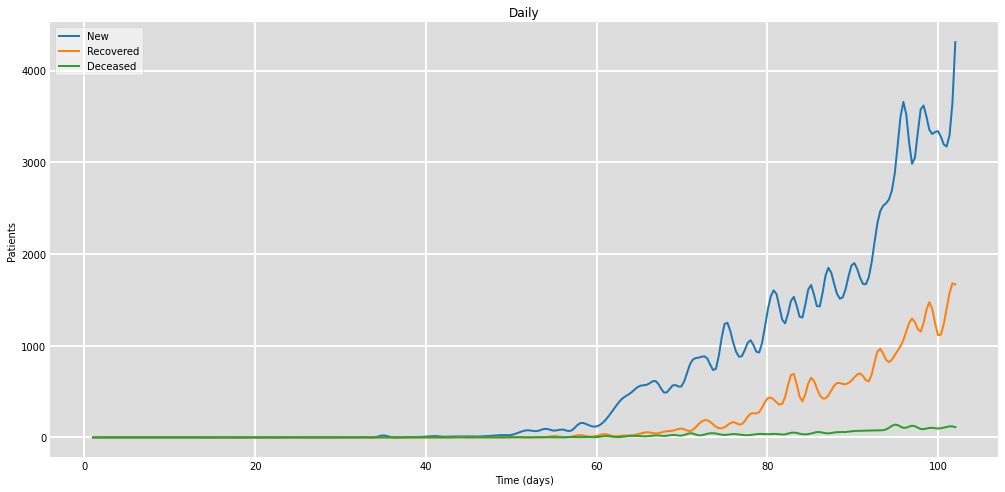

In [ ]:
plot_data(num_days,daily_cases,['New','Recovered','Deceased'],'Daily')

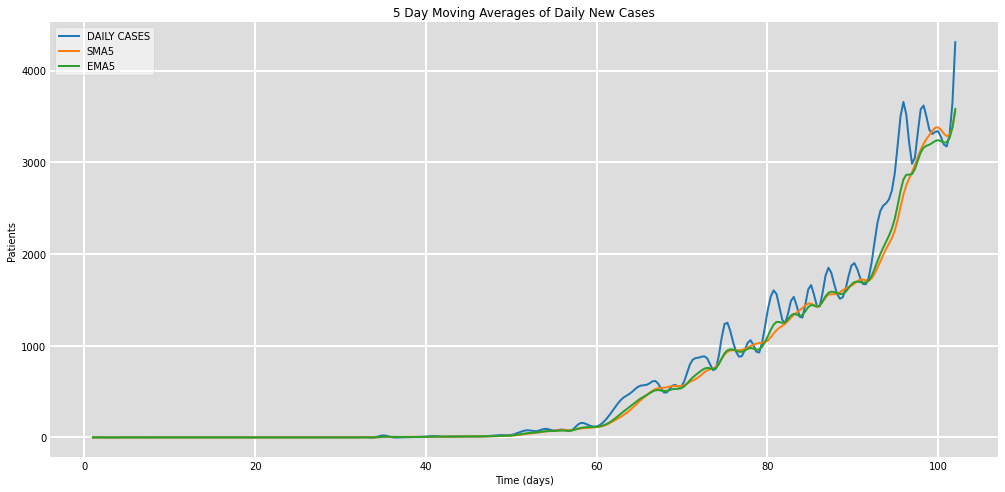

In [ ]:
plot_data(num_days,day5_moving_averages,['DAILY CASES','SMA5','EMA5'],'5 Day Moving Averages of Daily New Cases')

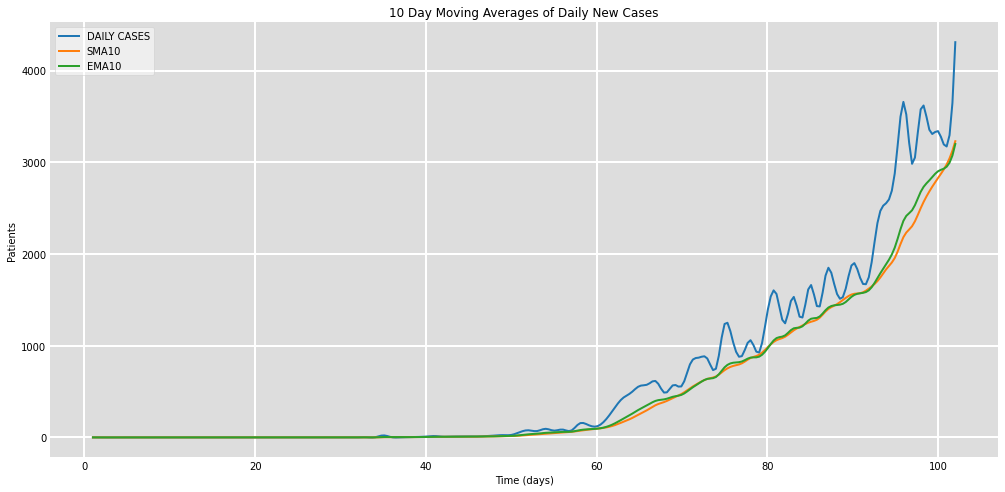

In [ ]:
plot_data(num_days,day10_moving_averages,['DAILY CASES','SMA10','EMA10'],'10 Day Moving Averages of Daily New Cases')

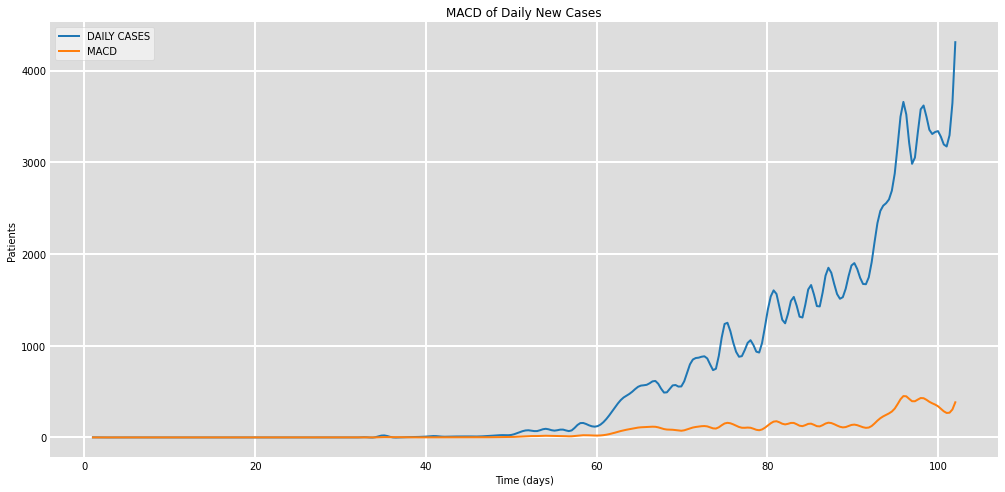

In [ ]:
plot_data(num_days,macd_moving_averages,['DAILY CASES','MACD'],'MACD of Daily New Cases')

In [ ]:
ages = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/AgeGroupDetails.csv')
state_data = pd.read_csv('/gdrive/My Drive/ml/STATE_DATA/combined_states.csv')
india_data=pd.read_csv('/gdrive/My Drive/ml/STATE_DATA/case_time_series.csv')
icu_beds = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/IndividualDetails.csv')
ICMR_details = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/StatewiseTestingDetails.csv')

In [ ]:
statewise_cases = pd.DataFrame(state_data.groupby(['STATE'])['CONFIRMED', 'DEATH', 'CURED'].max().reset_index())
print(statewise_cases)

                         STATE  CONFIRMED  DEATH   CURED
0   Andhra PradeshANDTelengana     3377.0   78.0  1878.0
1                        Bihar      830.0    6.0   382.0
2                        Delhi     7639.0   86.0  2512.0
3                       Gujrat     8904.0  537.0  3246.0
4              Jammu & Kashmir      934.0   10.0   455.0
5                    Karnataka      925.0   31.0   433.0
6               Madhya Pradesh     3986.0  226.0  1860.0
7                  Maharashtra    24427.0  920.0  5125.0
8          Punjab + Chandigarh     2101.0   35.0   199.0
9                    Rajasthan     4126.0  117.0  2454.0
10                  Tamil Nadu     8718.0   61.0  2134.0
11               Uttar Pradesh     3664.0   82.0  1873.0
12                 West Bengal     2173.0  198.0   612.0


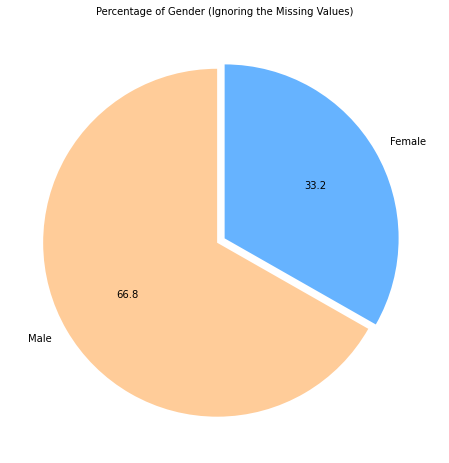

In [ ]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode = (0.05, 0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

In [ ]:
state_details = pd.pivot_table(india_data, values=['CONFIRMED', 'DEATH', 'CURED'], index='STATE', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['CURED'] / state_details['CONFIRMED'],5)
state_details['Death Rate'] = round(state_details['DEATH'] /state_details['CONFIRMED'], 5)
state_details = state_details.sort_values(by='CONFIRMED', ascending= False)
state_details.style.background_gradient(cmap='Blues')

,CONFIRMED,CURED,DEATH,Recovery Rate,Death Rate
STATE,,,,,
Maharashtra,24427.000000,5125.000000,920.000000,0.209810,0.037660
Gujrat,8904.000000,3246.000000,537.000000,0.364560,0.060310
Tamil Nadu,8718.000000,2134.000000,61.000000,0.244780,0.007000
Delhi,7639.000000,2512.000000,86.000000,0.328840,0.011260
Rajasthan,4126.000000,2454.000000,117.000000,0.594760,0.028360
Madhya Pradesh,3986.000000,1860.000000,226.000000,0.466630,0.056700
Uttar Pradesh,3664.000000,1873.000000,82.000000,0.511190,0.022380
Andhra PradeshANDTelengana,3377.000000,1878.000000,78.000000,0.556110,0.023100
West Bengal,2173.000000,612.000000,198.000000,0.281640,0.091120


In [ ]:
print('Total Confirmed Cases: ',sum((state_details['CONFIRMED'])))
print('Total Recovered Cases: ',sum((state_details['CURED'])))
print('Total Deaths: ',sum((state_details['DEATH'])))

Total Confirmed Cases:  71804.0
Total Recovered Cases:  23163.0
Total Deaths:  2387.0


In [ ]:
print('Percentage of Confirmed Cases: ',sum((state_details['CONFIRMED']))/74243*100)
print('Percentage of Recovered Cases: ',sum((state_details['CURED']))/24420*100)
print('Percentage of Deaths: ',sum((state_details['DEATH']))/2415*100)

Percentage of Confirmed Cases:  96.71484180326765
Percentage of Recovered Cases:  94.85257985257985
Percentage of Deaths:  98.84057971014492


In [ ]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

In [ ]:
state_test_details = pd.pivot_table(state_testing, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
state_test_details['Positive Test Rate'] = round(state_test_details['Positive'] / state_test_details['TotalSamples'],2)
state_test_details['Negative Test Rate'] = round(state_test_details['Negative'] /state_test_details['TotalSamples'], 2)
state_test_details = state_test_details.sort_values(by='TotalSamples', ascending= False)
state_test_details.style.background_gradient(cmap='Blues')

,Negative,Positive,TotalSamples,Positive Test Rate,Negative Test Rate
State,,,,,
Tamil Nadu,235157.000000,7204.000000,243037.000000,0.030000,0.970000
Maharashtra,206481.000000,20228.000000,225524.000000,0.090000,0.920000
Andhra Pradesh,171755.000000,1980.000000,173735.000000,0.010000,0.990000
Rajasthan,158830.000000,3814.000000,166424.000000,0.020000,0.950000
Uttar Pradesh,125696.000000,3467.000000,129955.000000,0.030000,0.970000
Gujarat,105298.000000,8195.000000,113493.000000,0.070000,0.930000
Karnataka,102266.000000,848.000000,107311.000000,0.010000,0.950000
Delhi,39920.000000,6923.000000,93810.000000,0.070000,0.430000
Madhya Pradesh,65436.000000,3614.000000,72069.000000,0.050000,0.910000


In [ ]:
print(india_data)

       Date  Daily Confirmed  Total Confirmed  ...      MACD-C      MACD-R    MACD-D
0    30-Jan                1                1  ...    0.000000    0.000000  0.000000
1    31-Jan                0                1  ...    0.000000    0.000000  0.000000
2    01-Feb                0                1  ...    0.000000    0.000000  0.000000
3    02-Feb                1                2  ...    0.000000    0.000000  0.000000
4    03-Feb                1                3  ...    0.000000    0.000000  0.000000
..      ...              ...              ...  ...         ...         ...       ...
99   08-May             3339            59690  ...  338.055026  135.681604  6.497362
100  09-May             3175            62865  ...  266.350385  147.014085  7.394828
101  10-May             4311            67176  ...  383.200719  182.920223  6.981808
102  11-May             3592            70768  ...  314.793727  177.787946  1.636953
103  12-May             3523            74292  ...  247.950035  2

In [ ]:
df= pd.read_csv('/gdrive/My Drive/ml/novel-corona-virus-2019-dataset/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [ ]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')


In [ ]:
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
23804,23805,2020-05-12,NaN,India,2020-05-13 03:32:00,74292,2415,24420


In [ ]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [ ]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
23804,23805,2020-05-12,India,India,2020-05-13 03:32:00,74292,2415,24420,0,0


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


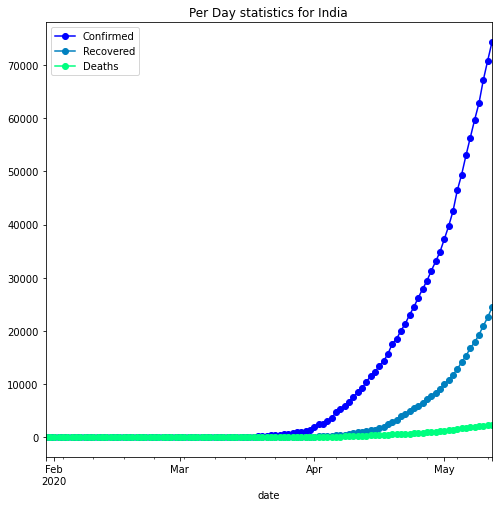

In [ ]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot.reset_index()

In [ ]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
num_plot_india['Recovered Case Increase']=0
num_plot_india['Confirmed Case Increase'][0]=0
num_plot_india['Death Case Increase'][0]=0
num_plot_india['Recovered Case Increase'][0]=0
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
    num_plot_india['Recovered Case Increase'][i]=-(num_plot_india.iloc[i-1][2]-num_plot_india.iloc[i][2])

num_plot_india.tail()

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase,Recovered Case Increase
99,2020-05-08,59695,17887,1985,3344,96,1111
100,2020-05-09,62808,19301,2101,3113,116,1414
101,2020-05-10,67161,20969,2212,4353,111,1668
102,2020-05-11,70768,22549,2294,3607,82,1580
103,2020-05-12,74292,24420,2415,3524,121,1871


In [ ]:
train = num_plot_india.iloc[:-3,:2]
test = num_plot_india.iloc[-3:,:2]

          date  Recovered
0   2020-01-30          0
1   2020-01-31          0
2   2020-02-01          0
3   2020-02-02          0
4   2020-02-03          0
..         ...        ...
96  2020-05-05      14142
97  2020-05-06      15331
98  2020-05-07      16776
99  2020-05-08      17887
100 2020-05-09      19301

[101 rows x 2 columns]


In [ ]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [ ]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.5,changepoints=['2020-04-03','2020-04-30'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


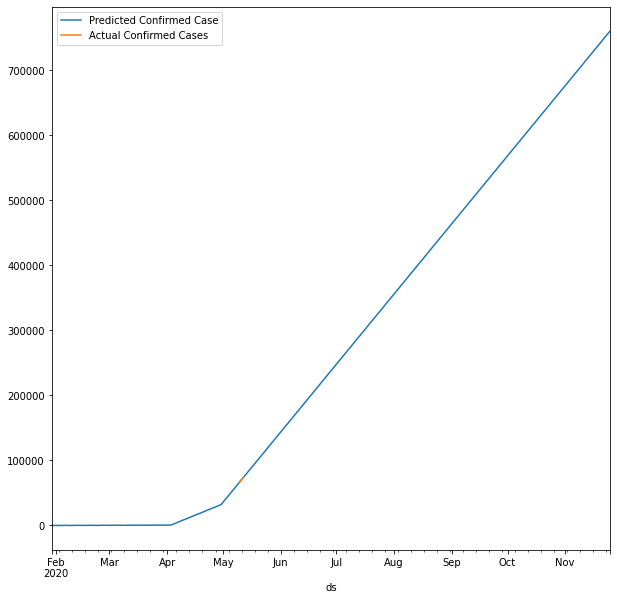

In [ ]:
future_dates = model.make_future_dataframe(periods=200)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

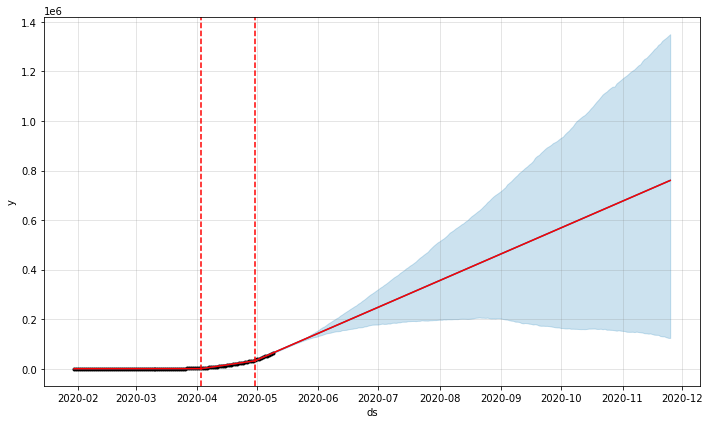

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


In [ ]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='60 days', period='20 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-04-16 00:00:00 and 2020-05-06 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,4.253366e+03,65.217833,61.609973,0.003248,0.003248,1.0
1,2 days,1.617102e+05,402.132126,322.612342,0.018586,0.018586,0.5
2,3 days,1.317532e+06,1147.837882,972.296447,0.047799,0.047799,0.5


In [ ]:
forecast.tail(20)

In [ ]:
train = num_plot_india.iloc[:-3,[0,3]]
test = num_plot_india.iloc[-3:,[0,3]]

In [ ]:
train.rename(columns={"date":"ds","Deaths":"y"},inplace=True)
test.rename(columns={"date":"ds","Deaths":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [ ]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.5,changepoints=['2020-04-03','2020-04-30'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


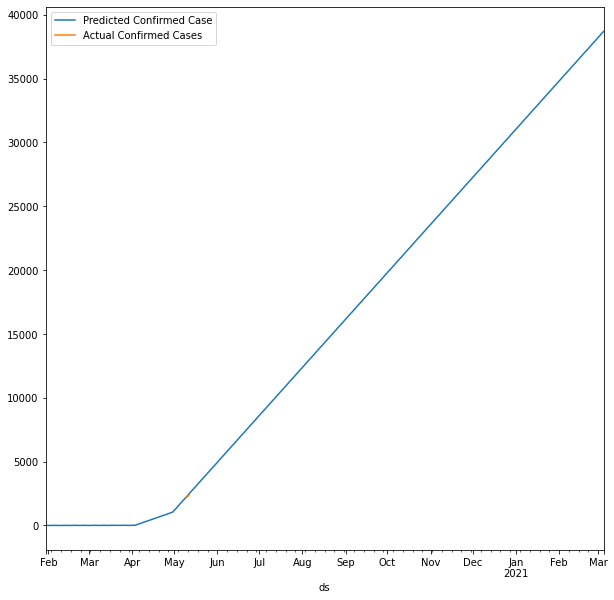

In [ ]:
future_dates = model.make_future_dataframe(periods=300)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

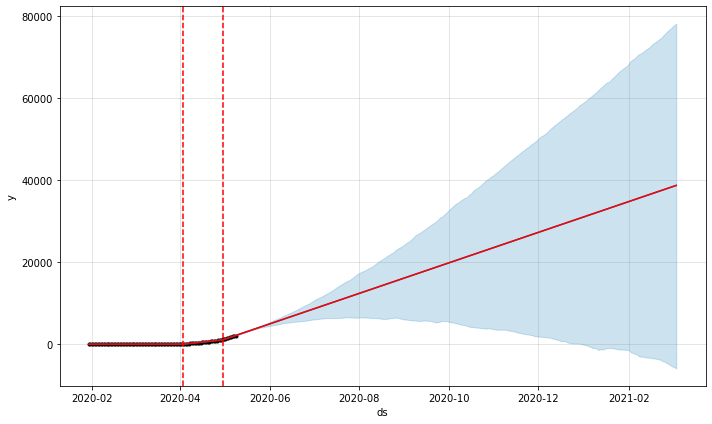

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='60 days', period='20 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-04-16 00:00:00 and 2020-05-06 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,72706.218810,269.640907,229.220549,0.093541,0.093541,0.5
1,2 days,281239.622630,530.320302,499.470212,0.146557,0.146557,0.5
2,3 days,491247.579897,700.890562,598.446351,0.174813,0.174813,0.5


In [ ]:
forecast.tail(20)

forecast.to_csv('/gdrive/My Drive/ml/death_predict.csv')